# Analyzing Chicago's state crime rate from 2012 to 2017
Using the libraries pandas , numpy, matplotlib, seaborn, datetime, dateutil , opendatasets

https://www.kaggle.com/datasets/currie32/crimes-in-chicago

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time
from dateutil import parser

# Downloading data set using kaggle's API   , https://www.kaggle.com/datasets/currie32/crimes-in-chicago

In [57]:
cc = pd.read_csv(r"C:\Users\godwi\GitHub\Python-Pandas\crimes-in-chicago\Chicago_Crimes_2012_to_2017.csv")
cc.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [58]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [59]:
cc.shape

(1456714, 23)

# Convert Date 'object' to datetime

In [60]:
cc.Date = pd.to_datetime(cc['Date'])
cc.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            5 non-null      int64         
 1   ID                    5 non-null      int64         
 2   Case Number           5 non-null      object        
 3   Date                  5 non-null      datetime64[ns]
 4   Block                 5 non-null      object        
 5   IUCR                  5 non-null      object        
 6   Primary Type          5 non-null      object        
 7   Description           5 non-null      object        
 8   Location Description  5 non-null      object        
 9   Arrest                5 non-null      bool          
 10  Domestic              5 non-null      bool          
 11  Beat                  5 non-null      int64         
 12  District              5 non-null      float64       
 13  Ward                  5 

In [61]:
plt.style.available  # list of matplotlib style theme

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [62]:
plt.style.use('seaborn-paper')

# What are the most crime charged with  ?

In [63]:
cc_stat1 = cc['Primary Type'].value_counts().to_frame().head(15)
# theft is the most crime
cc_stat1.head()

,Primary Type
THEFT,329460
BATTERY,263700
CRIMINAL DAMAGE,155455
NARCOTICS,135240
ASSAULT,91289


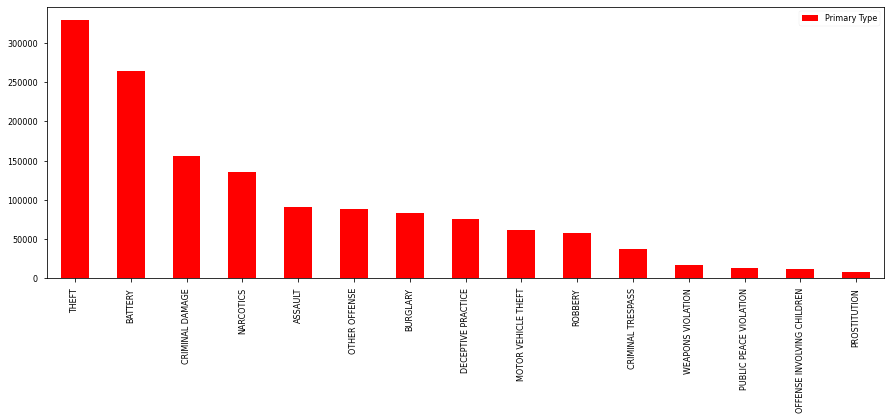

In [64]:
cc_stat1.plot(kind = 'bar', figsize = (15,5), orientation = 'vertical', color = 'red');

# What year had the highest crime rate ?

In [65]:
cc['year'] = pd.DatetimeIndex(cc['Date']).year

In [66]:
ccyear = cc.year.value_counts().to_frame().reset_index()
ccyear

,index,year
0,2012,335670
1,2013,306703
2,2014,274527
3,2016,265462
4,2015,262995
5,2017,11357


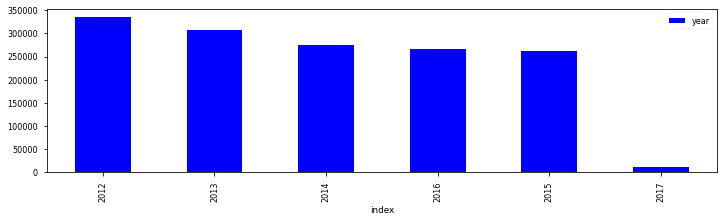

In [67]:
ccyear .plot(kind = 'bar', figsize = (12,3), x = 'index', y = 'year', color = 'blue')
plt.legend(loc = 'upper right');

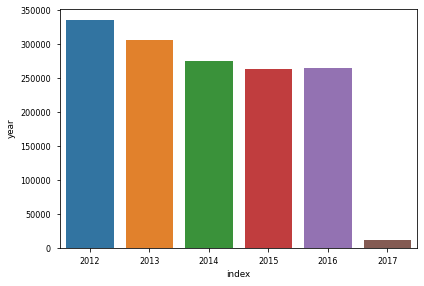

In [68]:
sns.barplot(data= ccyear, y = 'year' , x= 'index');

# How many arrests were made in relation to primary type crime

In [69]:
# How many arrests were made in relation to primary type crime
ccarrest  = cc.loc[:, ['Arrest','Primary Type']].groupby('Arrest').get_group(True).\
groupby('Primary Type').count(). sort_values('Arrest', ascending = False). head(10)
# Narcotics has the higest arrests rate
ccarrest

,Arrest
Primary Type,
NARCOTICS,134317
BATTERY,60501
THEFT,36673
CRIMINAL TRESPASS,25927
ASSAULT,21348
OTHER OFFENSE,18573
WEAPONS VIOLATION,13746
CRIMINAL DAMAGE,10165
PUBLIC PEACE VIOLATION,9949


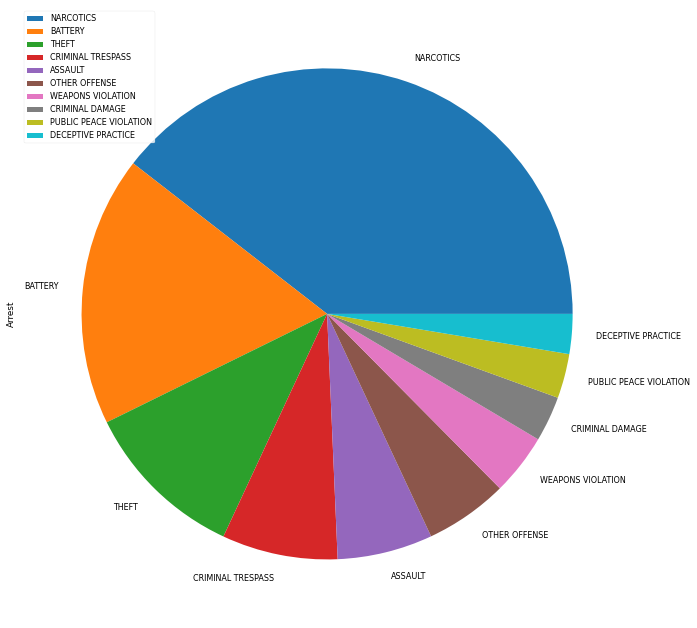

In [70]:
#  pie chart for first 10
ccarrest.plot(kind = 'pie', subplots = True, figsize = (11,17))
plt.legend(fontsize = 8, loc = 'upper left')

# Which block has the highest calls / reports ?

In [71]:
# Which block has the highest calls
ccblock = cc.loc[0:, ['Block','Primary Type']].set_index('Block').groupby\
('Block').count().sort_values('Primary Type', ascending = False).reset_index().head()
ccblock

,Block,Primary Type
0,001XX N STATE ST,3634
1,0000X W TERMINAL ST,2746
2,008XX N MICHIGAN AVE,2465
3,076XX S CICERO AVE,2116
4,0000X N STATE ST,1844


In [72]:
# show on bar chart with matplotlib
cc.head(3)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,year
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",2016
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",2016
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",2016


<AxesSubplot:xlabel='Primary Type', ylabel='Block'>

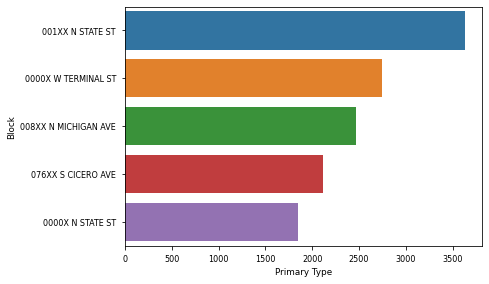

In [73]:
# show on bar chart with seaborn
sns.barplot(data = ccblock, x = ccblock['Primary Type'] , y = ccblock['Block'],)

# How are the calls complaints disrributed by time of day? 

In [74]:
cc['time'] = pd.DatetimeIndex(cc['Date']).time

In [75]:
cc.time = pd.to_datetime

In [76]:
cc['time'] = pd.DatetimeIndex(cc['Date']).time
cc.time.value_counts().sort_values(ascending = False).head()

09:00:00    36006
12:00:00    35314
18:00:00    28290
15:00:00    26887
22:00:00    26717
Name: time, dtype: int64

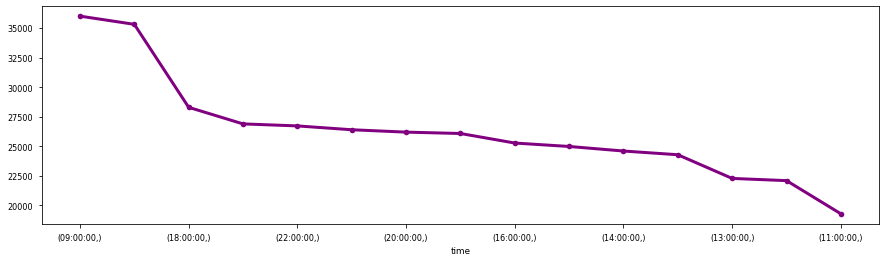

In [77]:
cctime = cc.time.to_frame().value_counts().head(15)
cctime.plot(kind = 'line' , x = 'time', figsize = (15,4), color = 'purple', linewidth = 3, marker='o');

# What locations have most reports  ?

In [78]:
cc['Location Description'].value_counts()

STREET                330471
RESIDENCE             233530
APARTMENT             185023
SIDEWALK              160891
OTHER                  55774
                       ...  
CLUB                       1
CTA "L" PLATFORM           1
GARAGE/AUTO REPAIR         1
CHURCH PROPERTY            1
LAGOON                     1
Name: Location Description, Length: 142, dtype: int64

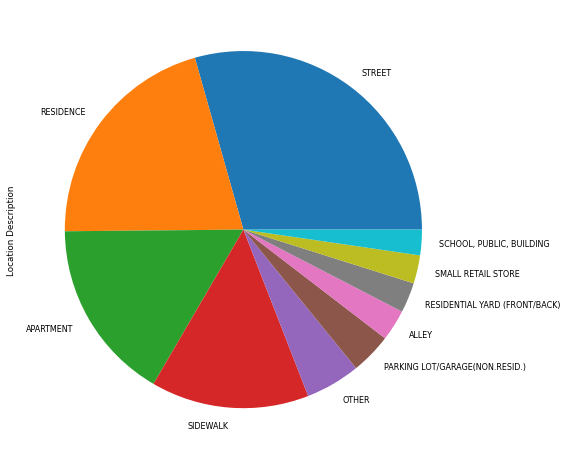

In [79]:
cc['Location Description'].value_counts().head(10).plot(kind = 'pie', figsize = (8,10));

In [92]:
sbloc = cc['Location Description'].value_counts().head(10)
sbloc

STREET                            330471
RESIDENCE                         233530
APARTMENT                         185023
SIDEWALK                          160891
OTHER                              55774
PARKING LOT/GARAGE(NON.RESID.)     41768
ALLEY                              31771
RESIDENTIAL YARD (FRONT/BACK)      30645
SMALL RETAIL STORE                 28803
SCHOOL, PUBLIC, BUILDING           25959
Name: Location Description, dtype: int64

<AxesSubplot:>

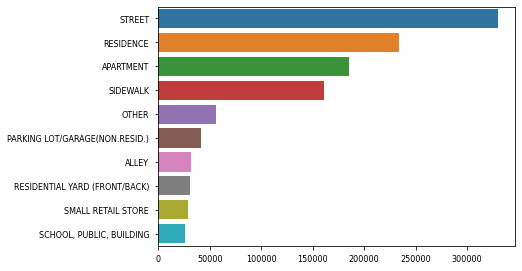

In [105]:
sns.barplot(data= sbloc.to_frame(), y = sbloc.index, x=sbloc.values)